/var/folders/jh/8qnr5mvd3rlc1zcpbx5xqb_h0000gn/T/ipykernel_13636/990414541.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


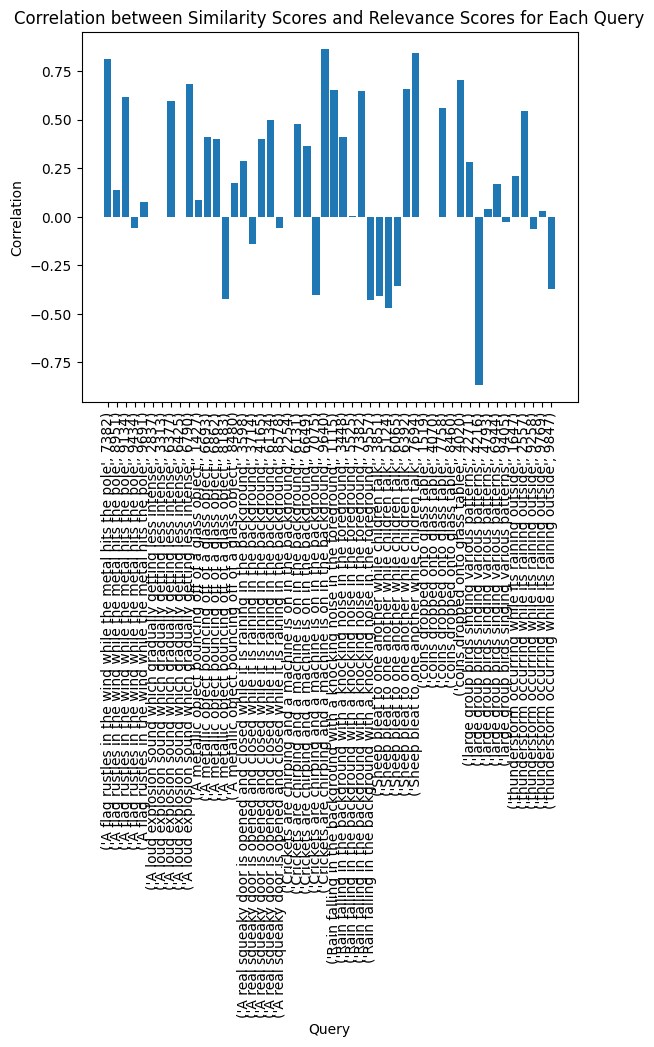

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('../results.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query', 'batch_index'])

correlations = []
query_labels = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['normalized_relevance']

    # correlation, p_value = stats.pearsonr(similarity_scores, relevance_scores)
    correlation = similarity_scores.corr(relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

# Plotting the correlations
fig, ax = plt.subplots()

ax.bar(query_labels, correlations)
ax.set_xlabel('Query')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between Similarity Scores and Relevance Scores for Each Query')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

correlation 0.4559168859338055
similarity_scores 60    0.2542
61    0.2081
62    0.2834
63    0.2737
64    0.2148
65    0.2291
66    0.2405
67    0.2458
68    0.2729
69    0.2437
70    0.2098
71    0.2579
72    0.4081
73    0.2087
74    0.2045
75    0.2063
76    0.2263
77    0.3270
78    0.2484
79    0.3761
Name: similarity_score_by_model, dtype: float64
relevance_scores 60     3
61     1
62     7
63     2
64     1
65     1
66     6
67     5
68     2
69     1
70     1
71     9
72    10
73     7
74     1
75     1
76     1
77     6
78     1
79     1
Name: user_relevance_score, dtype: int64
correlation -0.2544305015947851
similarity_scores 20    0.5637
21    0.5089
22    0.6002
23    0.5729
24    0.5342
25    0.5462
26    0.5471
27    0.5559
28    0.5691
29    0.5486
30    0.5282
31    0.5690
32    0.6447
33    0.5267
34    0.5061
35    0.5064
36    0.5433
37    0.6134
38    0.5586
39    0.6432
Name: similarity_score_by_model, dtype: float64
relevance_scores 20     7
21    10
22     9
23 

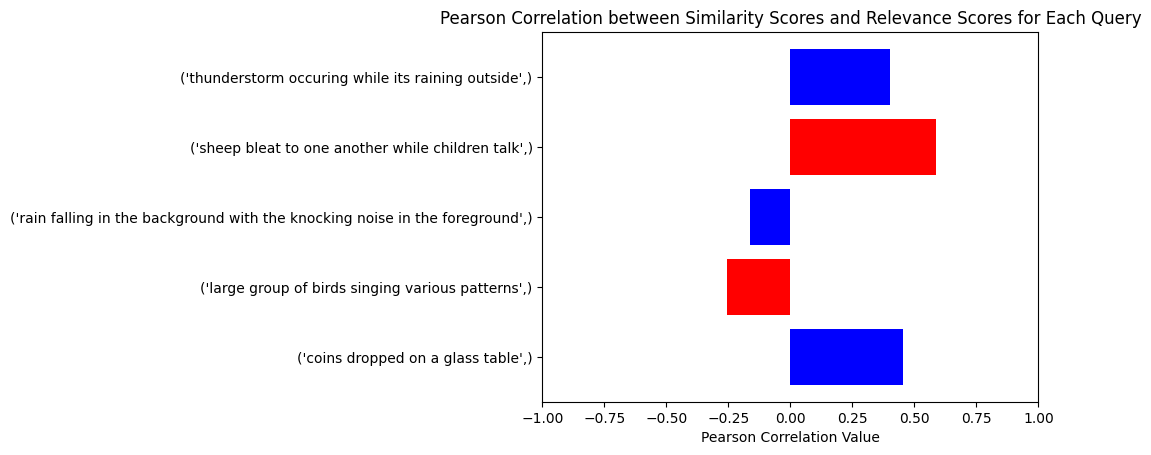

In [129]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('../results_sam.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query'])

correlations = []
query_labels = []

colors = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['user_relevance_score']

    correlation = similarity_scores.corr(relevance_scores)
    print('correlation',correlation)
    print('similarity_scores',similarity_scores)
    print('relevance_scores',relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

    # Assign a color to each data point
    colors.extend(['blue', 'red'] * 10)  # Add more colors as needed

# Plotting the correlations
fig, ax = plt.subplots()

# Define colors for the bars
# colors = ['red' if corr < 0 else 'green' for corr in correlations]


# Plot the colored bars
ax.barh(range(len(correlations)), correlations, color=colors)

# Set the y-axis tick positions and labels
ax.set_yticks(range(len(correlations)))
ax.set_yticklabels(query_labels)

# Set the x-axis limits
ax.set_xlim(-1, 1)

# Set the x-axis label and title
ax.set_xlabel('Pearson Correlation Value')
ax.set_title('Pearson Correlation between Similarity Scores and Relevance Scores for Each Query')

# Show the plot
plt.show()





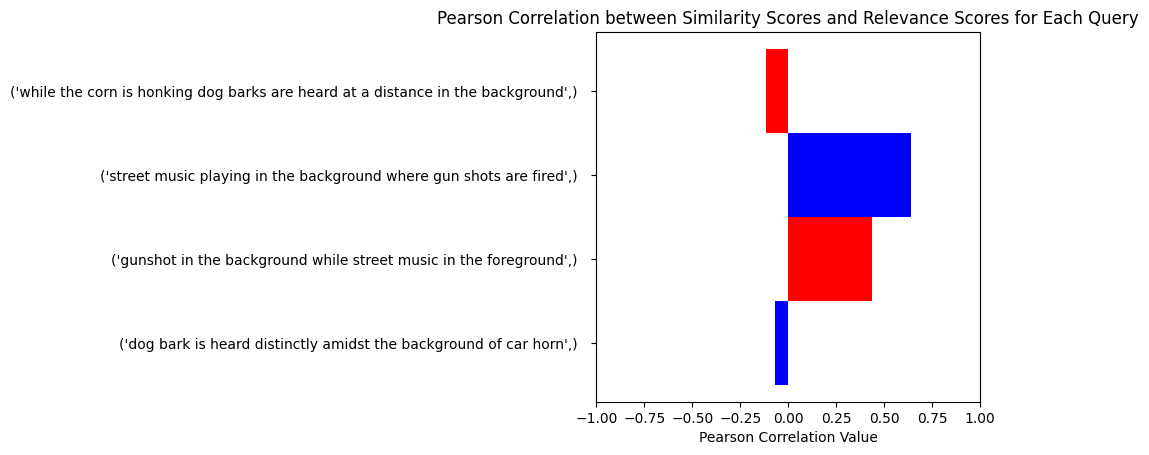

In [131]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import textwrap

# Load the data from the CSV file
data = pd.read_csv('../results_fgbg_sam.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query'])

correlations = []
query_labels = []

colors = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['user_relevance_score']

    correlation = similarity_scores.corr(relevance_scores)
    # print('correlation',correlation)
    # print('similarity_scores',similarity_scores)
    # print('relevance_scores',relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

    # Assign a color to each data point
    colors.extend(['blue', 'red'])  # Add more colors as needed

# Plotting the correlations
fig, ax = plt.subplots()

# Define colors for the bars
# colors = ['red' if corr < 0 else 'green' for corr in correlations]


# Plot the colored bars
ax.barh(range(len(correlations)), correlations, height=1,color=colors)

# Set the y-axis tick positions and labels
ax.set_yticks(range(len(correlations)))
# wrapped_labels = [textwrap.fill(label, width=50) if len(label.split()) > 10 else label for label in query_labels]
ax.set_yticklabels(query_labels)

# Set the x-axis limits
ax.set_xlim(-1, 1)
# Increase the spacing between the y-axis tick labels and the y-axis
ax.tick_params(axis='y', which='major', pad=10)




# Set the x-axis label and title
ax.set_xlabel('Pearson Correlation Value')
ax.set_title('Pearson Correlation between Similarity Scores and Relevance Scores for Each Query')

# Adjust the subplot parameters to leave space for the longer y-labels
plt.subplots_adjust(left=0.3)

# Show the plot
plt.show()


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForTokenClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions

corr_vals [2.257606538055081, 1.0660567737527686, 0.7741067050710525, 1.0317823276005016, 1.04384266018823, 0.6821269496642655, 0.33495908847594025, 0.17848902895714686, 0.1662824494726773, 0.9024014132380269, 0.36577963071221975, 0.08123098237596053, 0.3229079899001049, 0.9750621628558285, 0.577513776344412, 1.2517175168573695, 0.3592189597641606, 0.3592189597641606, 0.3592189597641606, 0.4210569656472316, 0.24725397617205203, 0.03410066613306932, 0.5303834601015208, 0.04713031624289121, 0.04713031624289121, 0.04713031624289121, -0.19293651029148326, -0.19293651029148326, 0.7213340567558487]


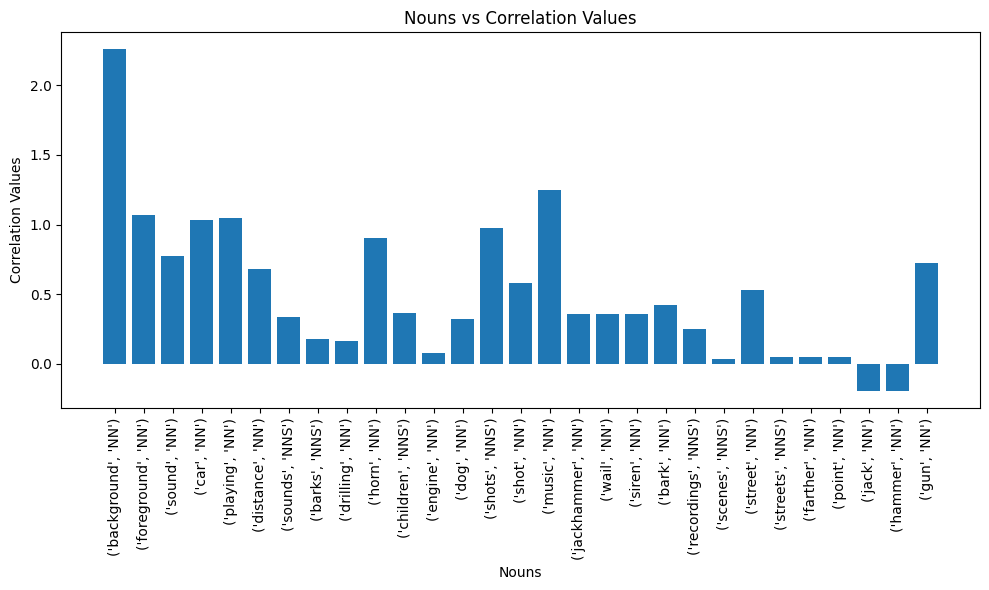

In [107]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import spacy

from transformers import pipeline

# Load the data from the CSV file
data = pd.read_csv('../results_fgbg.csv')

# # Normalize the similarity scores from -1 to 1 to a range of 0 to 1
# data['normalized_similarity'] = data['similarity_score_by_model']

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 5.5) / 4.5

# Group the data by the query and batch index
grouped_data = data.groupby(['query'])

correlations = []
query_labels = []
# Load the POS tagging pipeline for RoBERTa
nlp = pipeline("ner", model="roberta-base", tokenizer="roberta-base")

nltk.download('punkt')  # Download necessary resources
nltk.download('averaged_perceptron_tagger')  # Download necessary resources


correlations = []
query_labels = []

colors = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['user_relevance_score']

    correlation = similarity_scores.corr(relevance_scores)
    # check if correlation value is greater than 1
    if correlation > 1:
        # print similarity_scores
        print('similarity_scores: ', similarity_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))


# # Load the CSV file
# df = pd.read_csv('../results_fgbg.csv')


# # Extract the relevant columns
# queries = df['query']
# correlations = df['user_relevance_score']

# # Preprocess the text queries
# preprocessed_queries = query_labels.apply(lambda x: word_tokenize(x.lower()))

# Preprocess the query labels
preprocessed_queries = [word_tokenize(query.lower()) for query in query_labels]


# # Extract nouns from the queries using NLTK
# tagged_queries = preprocessed_queries.apply(lambda x: nltk.pos_tag(x))
# nouns = tagged_queries.apply(lambda x: [word for word, pos in x if pos.startswith('N')])

# Extract nouns from the queries using NLTK
tagged_queries = [nltk.pos_tag(query) for query in preprocessed_queries]
nouns = [[(word,pos)for word, pos in query if pos.startswith('N')] for query in tagged_queries]

# # Extract nouns from the queries using spaCy
# nlp = spacy.load('en_core_web_sm')
# tagged_queries = preprocessed_queries.apply(lambda x: nlp(' '.join(x)))
# nouns = tagged_queries.apply(lambda x: [token.text for token in x if token.pos_ == 'NOUN'])

# Compute noun frequency and correlation values
noun_freq = {}
noun_corr = {}

for i, noun_list in enumerate(nouns):
    corr_val = correlations[i]
    for noun in noun_list:
        if noun not in noun_freq:
            noun_freq[noun] = 0
            noun_corr[noun] = 0
        noun_freq[noun] += 1
        noun_corr[noun] += corr_val


# Sort the nouns based on their frequency
sorted_nouns = sorted(noun_freq.items(), key=lambda x: x[1], reverse=True)

# Extract the nouns and correlation values
nouns = [noun for noun, _ in sorted_nouns]
corr_vals = [noun_corr[noun] for noun, _ in sorted_nouns]
print('corr_vals', corr_vals)
# Plot the nouns vs correlation values
plt.figure(figsize=(10, 6))
plt.bar(range(len(nouns)), corr_vals, align='center')
plt.xticks(range(len(nouns)), nouns, rotation=90)
plt.xlabel('Nouns')
plt.ylabel('Correlation Values')
plt.title('Nouns vs Correlation Values')
plt.tight_layout()


plt.show()

# # Write results to a file
# output_file = 'noun_correlation_results.txt'
# with open(output_file, 'w') as file:
#     file.write("Noun\tFrequency\tTotal Correlation\n")
#     for noun, freq in sorted_nouns:
#         corr_val = noun_corr[noun]
#         file.write(f"{noun}\t{freq}\t{corr_val}\n")

# print(f"Results written to {output_file}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dilipharish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dilipharish/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


text pos ['( (PUNCT)', "' (PUNCT)", 'a (DET)', 'jackhammer (NOUN)', 'pounds (NOUN)', 'away (ADV)', 'with (ADP)', 'its (PRON)', 'drilling (NOUN)', 'sound (NOUN)', ', (PUNCT)', 'accompanied (VERB)', 'by (ADP)', 'the (DET)', 'piercing (VERB)', 'wail (NOUN)', 'of (ADP)', 'a (DET)', 'siren (NOUN)', 'in (ADP)', 'the (DET)', 'distance (NOUN)', "' (PUNCT)", ', (PUNCT)', ') (PUNCT)']
text pos ['( (PUNCT)', "' (PUNCT)", 'dog (NOUN)', 'bark (NOUN)', 'is (AUX)', 'heard (VERB)', 'distinctly (ADV)', 'amidst (ADP)', 'the (DET)', 'background (NOUN)', 'of (ADP)', 'the (DET)', 'car (NOUN)', 'horn (NOUN)', "' (PUNCT)", ', (PUNCT)', ') (PUNCT)']
text pos ['( (PUNCT)', "' (PUNCT)", 'find (VERB)', 'recordings (NOUN)', 'of (ADP)', 'car (NOUN)', 'horn (NOUN)', 'sounds (VERB)', 'with (ADP)', 'children (NOUN)', 'playing (VERB)', 'in (ADP)', 'the (DET)', 'background (NOUN)', "' (PUNCT)", ', (PUNCT)', ') (PUNCT)']
text pos ['( (PUNCT)', "' (PUNCT)", 'children (NOUN)', 'playing (VERB)', 'in (ADP)', 'the (DET)', 'f

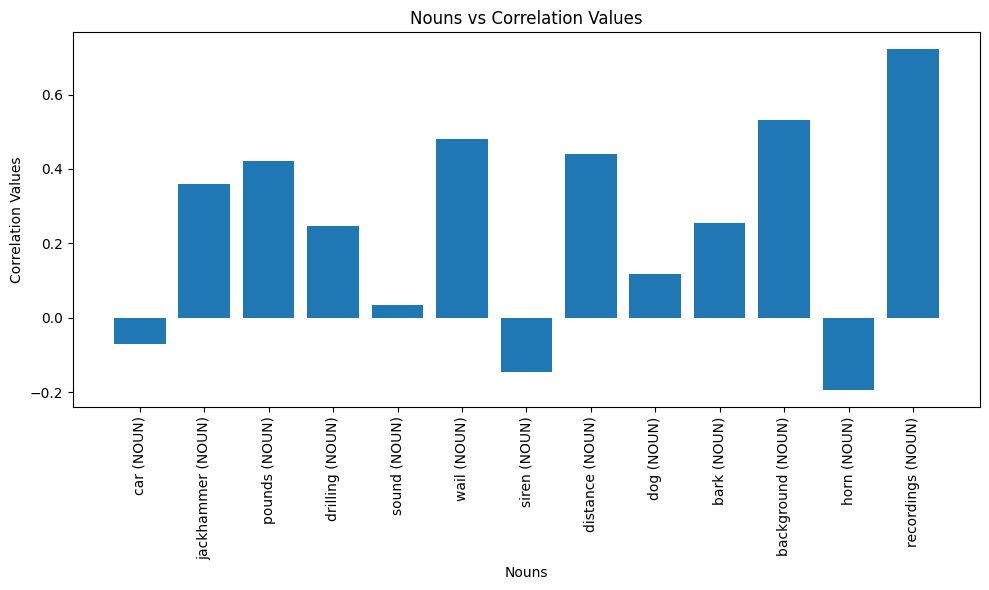

In [110]:
import pandas as pd
import spacy

# Load the spaCy model for POS tagging
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')  # Download necessary resources
nltk.download('averaged_perceptron_tagger')  # Download necessary resources


correlations = []
query_labels = []

colors = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['similarity_score_by_model']
    relevance_scores = group_data['user_relevance_score']

    correlation = similarity_scores.corr(relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))


# Preprocess the query labels
for query in query_labels:
    doc = nlp(query.lower())
    preprocessed_queries.append([token.text for token in doc])

# Extract nouns from the queries using spaCy
nouns = []
for query in preprocessed_queries:
    doc = nlp(' '.join(query))
    print('text pos', [f"{token.text} ({token.pos_})" for token in doc] )

    nouns_tags = [f"{token.text} ({token.pos_})" for token in doc if token.pos_ == "NOUN"]
    nouns.extend(nouns_tags)

# Compute noun frequency and correlation values
noun_freq = {}
noun_corr = {}

for noun, correlation in zip(nouns, correlations):
    if noun not in noun_freq:
        noun_freq[noun] = 0
        noun_corr[noun] = 0
    noun_freq[noun] += 1
    noun_corr[noun] += correlation

# Sort the nouns based on their frequency
sorted_nouns = sorted(noun_freq.items(), key=lambda x: (x[1], print(f"{x[0]}: {x[1]}")), reverse=True)

# Extract the nouns and correlation values
nouns = [noun for noun, _ in sorted_nouns]
corr_vals = [noun_corr[noun] for noun, _ in sorted_nouns]

# Plot the nouns vs correlation values
plt.figure(figsize=(10, 6))
plt.bar(range(len(nouns)), corr_vals, align='center')
plt.xticks(range(len(nouns)), nouns, rotation=90)
plt.xlabel('Nouns')
plt.ylabel('Correlation Values')
plt.title('Nouns vs Correlation Values')
plt.tight_layout()


plt.show()

# # Write results to a file
# output_file = 'noun_correlation_results.txt'
# with open(output_file, 'w') as file:
#     file.write("Noun\tFrequency\tTotal Correlation\n")
#     for noun, freq in sorted_nouns:
#         corr_val = noun_corr[noun]
#         file.write(f"{noun}\t{freq}\t{corr_val}\n")

# print(f"Results written to {output_file}")


In [1]:
from  torchmetrics.functional.retrieval.recall import retrieval_recall
from torch import tensor

preds = tensor([0.2, 0.3, 0.5])
target = tensor([1, 0, 0])
retrieval_recall(preds, target, top_k=2)

/Users/dilipharish/Library/Caches/pypoetry/virtualenvs/freesound-crossmodal-search-rhICCOhS-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.)